# Assignment 1: Visualization Design

https://courses.cs.washington.edu/courses/cse512/24sp/a1.html

https://observablehq.com/@uwdata/hours-of-sunshine

In [14]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

In [15]:
sunshine_df = pd.read_csv('sunshine.csv')

In [16]:
sunshine_gdf = gpd.GeoDataFrame(sunshine_df,geometry=gpd.points_from_xy(sunshine_df.lon,sunshine_df.lat),crs='EPSG:4326')

In [17]:
f,ax=plt.subplots()
sunshine_gdf.plot(ax=ax)
ctx.add_basemap(ax, crs=sunshine_gdf.crs,source=ctx.providers.OpenStreetMap.Mapnik)

In [ ]:
sunshine_df

,city,lon,lat,month,monthnum,sunshine
0,Chicago,-87.623177,41.881832,Jan,0,135
1,Chicago,-87.623177,41.881832,Feb,1,136
2,Chicago,-87.623177,41.881832,Mar,2,187
3,Chicago,-87.623177,41.881832,Apr,3,215
4,Chicago,-87.623177,41.881832,May,4,281
...,...,...,...,...,...,...
67,Seattle,-122.335167,47.608013,Aug,7,281
68,Seattle,-122.335167,47.608013,Sep,8,221
69,Seattle,-122.335167,47.608013,Oct,9,142
70,Seattle,-122.335167,47.608013,Nov,10,72


In [ ]:
!pip install seaborn

^C


In [ ]:
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
g = sns.FacetGrid(df, col='city', col_wrap=3, height=4)
g.map(sns.barplot, 'month', 'hours_of_sunshine', ci=None)

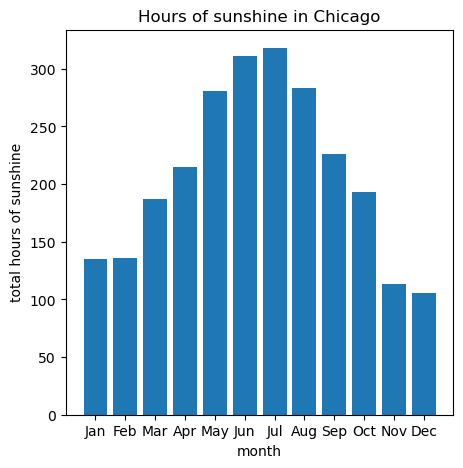

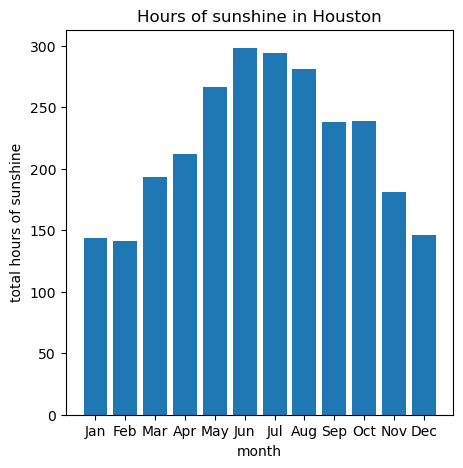

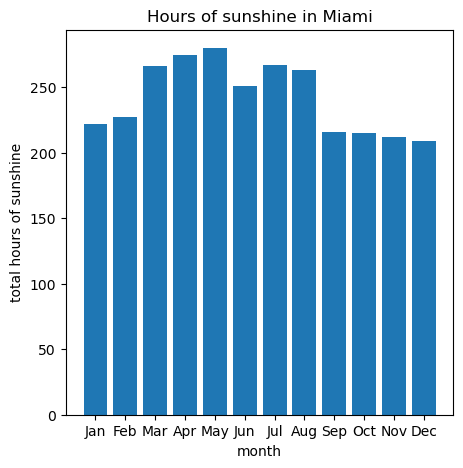

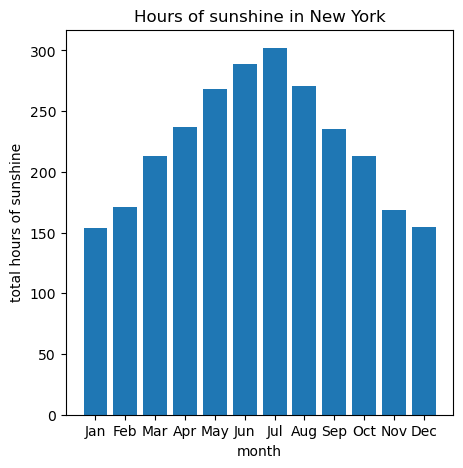

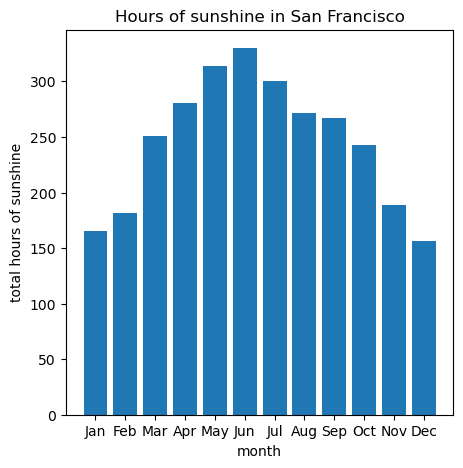

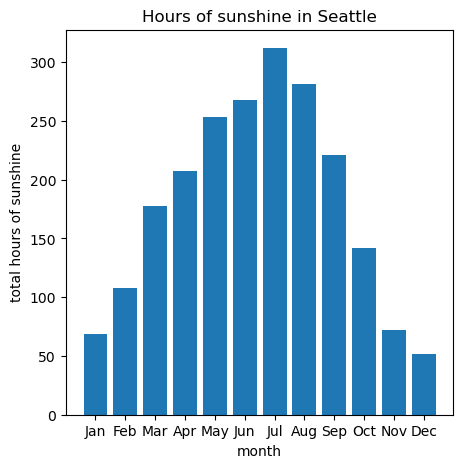

In [ ]:
for city, city_data in sunshine_df.groupby('city'):
    plt.figure(figsize=(5,5))
    plt.bar(city_data['month'],city_data['sunshine'])
    plt.xlabel('month')
    plt.ylabel('total hours of sunshine')
    plt.title(f'Hours of sunshine in {city}')